# Regression Analysis on Second Hand Dataset using Deep Learning MLP

## Project Overview
This notebook implements **Multi-Layer Perceptron (MLP)** models using both **PyTorch** and **TensorFlow** for regression analysis on a second-hand car dataset. We'll predict the current price of second-hand cars based on various features.

## Objectives
1. Build Deep Learning MLP models using PyTorch and TensorFlow
2. Implement evaluation metrics: RMSE, MSE, and R-squared
3. Provide mathematical explanations for all equations used

## Dataset Description
The second-hand dataset contains information about used cars including:
- **Features**: on_road_old, on_road_now, years, km, rating, condition, economy, top_speed, hp, torque
- **Target**: current_price

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# PyTorch imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# TensorFlow imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
tf.random.set_seed(42)

print("Libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"TensorFlow version: {tf.__version__}")

Libraries imported successfully!
PyTorch version: 2.7.1+cpu
TensorFlow version: 2.19.0


## 1. Data Loading and Exploration

In [5]:
# Load the dataset
data_path = '../Dataset/secondhanddataset.csv'
df = pd.read_csv(data_path)

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Dataset shape: (1000, 12)

First 5 rows:


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [6]:
# Dataset information
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()

Dataset Info:
Shape: (1000, 12)

Column names: ['v.id', 'on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']

Data types:
v.id               int64
on road old        int64
on road now        int64
years              int64
km                 int64
rating             int64
condition          int64
economy            int64
top speed          int64
hp                 int64
torque             int64
current price    float64
dtype: object

Missing values:
v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

Basic statistics:


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


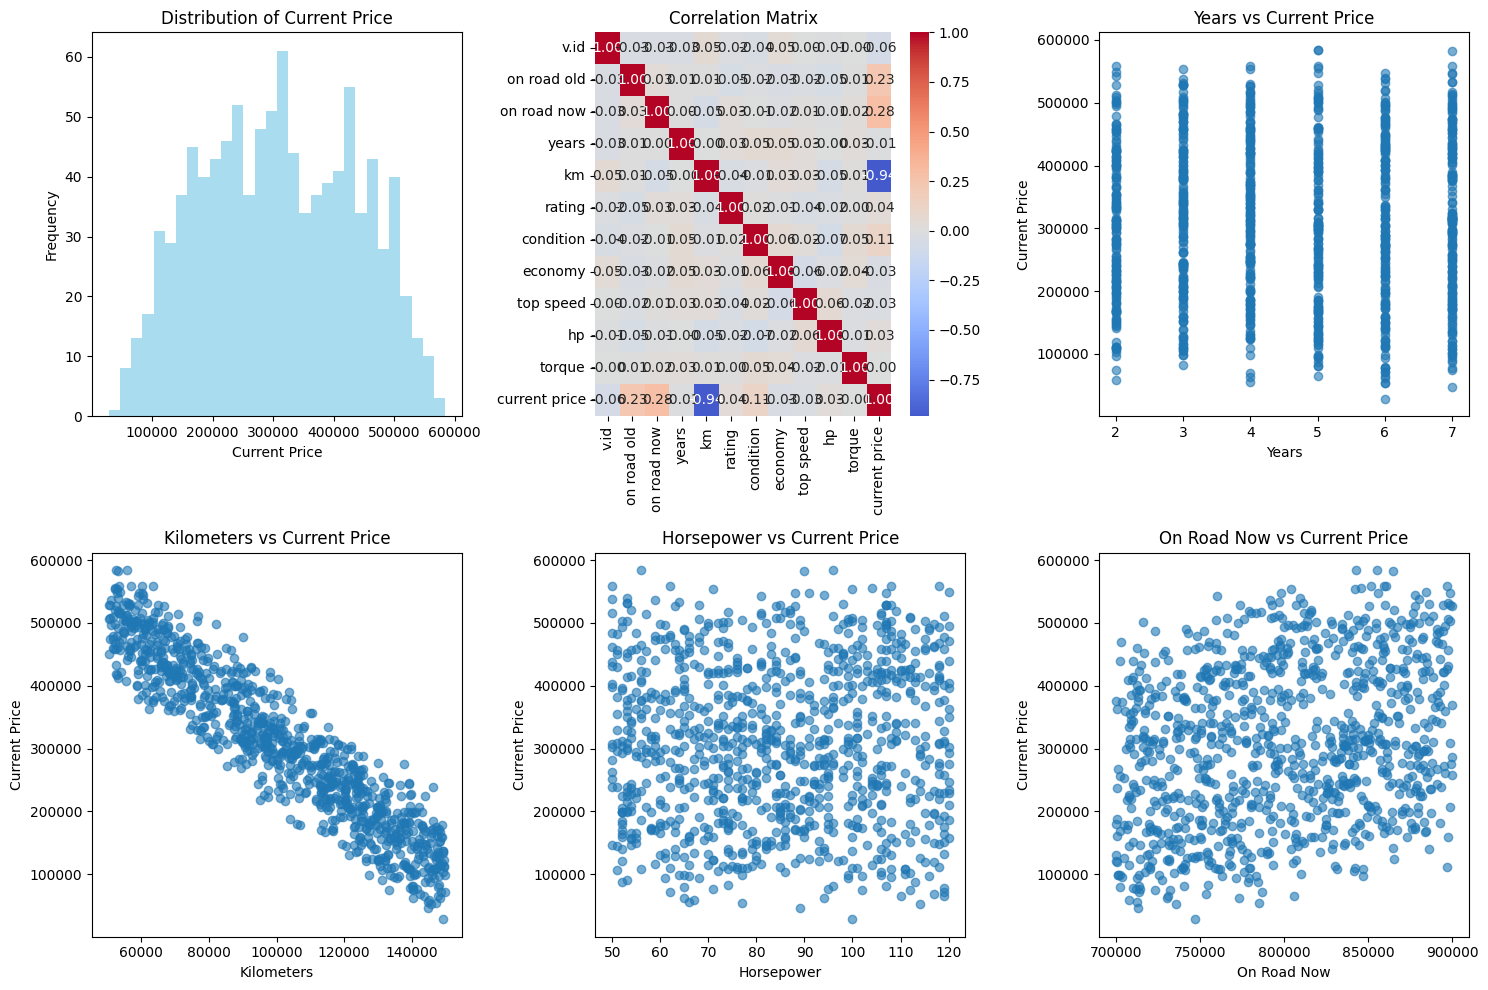

In [7]:
# Data visualization
plt.figure(figsize=(15, 10))

# Target variable distribution
plt.subplot(2, 3, 1)
plt.hist(df['current price'], bins=30, alpha=0.7, color='skyblue')
plt.title('Distribution of Current Price')
plt.xlabel('Current Price')
plt.ylabel('Frequency')

# Correlation heatmap
plt.subplot(2, 3, 2)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')

# Scatter plots of key features vs target
plt.subplot(2, 3, 3)
plt.scatter(df['years'], df['current price'], alpha=0.6)
plt.title('Years vs Current Price')
plt.xlabel('Years')
plt.ylabel('Current Price')

plt.subplot(2, 3, 4)
plt.scatter(df['km'], df['current price'], alpha=0.6)
plt.title('Kilometers vs Current Price')
plt.xlabel('Kilometers')
plt.ylabel('Current Price')

plt.subplot(2, 3, 5)
plt.scatter(df['hp'], df['current price'], alpha=0.6)
plt.title('Horsepower vs Current Price')
plt.xlabel('Horsepower')
plt.ylabel('Current Price')

plt.subplot(2, 3, 6)
plt.scatter(df['on road now'], df['current price'], alpha=0.6)
plt.title('On Road Now vs Current Price')
plt.xlabel('On Road Now')
plt.ylabel('Current Price')

plt.tight_layout()
plt.show()

## 2. Data Preprocessing

### Mathematical Foundation of Data Preprocessing

**Feature Scaling (Standardization):**

The standardization formula transforms features to have zero mean and unit variance:

$$z = \frac{x - \mu}{\sigma}$$

Where:
- $z$ = standardized value
- $x$ = original value
- $\mu$ = mean of the feature
- $\sigma$ = standard deviation of the feature

This is crucial for neural networks as it:
1. Ensures all features contribute equally to the learning process
2. Prevents features with larger scales from dominating
3. Improves convergence speed and stability

In [8]:
# Data preprocessing
# Separate features and target
X = df.drop(['current price', 'v.id'], axis=1)  # Remove target and ID column
y = df['current price']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:", X.columns.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Feature scaling using StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit and transform features
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scale target variable (reshape for sklearn)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

print("\nData preprocessing completed!")
print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled training target shape: {y_train_scaled.shape}")

Features shape: (1000, 10)
Target shape: (1000,)

Feature columns: ['on road old', 'on road now', 'years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque']

Training set size: 800
Testing set size: 200

Data preprocessing completed!
Scaled training features shape: (800, 10)
Scaled training target shape: (800,)


## 3. PyTorch MLP Model

### Mathematical Foundation of Multi-Layer Perceptron (MLP)

**Forward Propagation:**

For a neural network with layers, the forward pass is computed as:

$$z^{[l]} = W^{[l]} \cdot a^{[l-1]} + b^{[l]}$$
$$a^{[l]} = g(z^{[l]})$$

Where:
- $z^{[l]}$ = linear transformation at layer $l$
- $W^{[l]}$ = weight matrix at layer $l$
- $a^{[l-1]}$ = activation from previous layer
- $b^{[l]}$ = bias vector at layer $l$
- $g()$ = activation function (ReLU, Sigmoid, etc.)

**ReLU Activation Function:**
$$ReLU(x) = \max(0, x)$$

**Loss Function (Mean Squared Error):**
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Backpropagation:**
The gradient with respect to weights is computed using the chain rule:
$$\frac{\partial L}{\partial W^{[l]}} = \frac{\partial L}{\partial z^{[l]}} \cdot \frac{\partial z^{[l]}}{\partial W^{[l]}}$$

In [9]:
# PyTorch MLP Model Definition
class PyTorchMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate=0.2):
        """
        Multi-Layer Perceptron for Regression
        
        Args:
            input_size: Number of input features
            hidden_sizes: List of hidden layer sizes
            output_size: Number of output neurons (1 for regression)
            dropout_rate: Dropout probability for regularization
        """
        super(PyTorchMLP, self).__init__()
        
        # Create layers dynamically
        layers = []
        prev_size = input_size
        
        # Hidden layers
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size
        
        # Output layer (no activation for regression)
        layers.append(nn.Linear(prev_size, output_size))
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        """Forward pass through the network"""
        return self.network(x)

# Model parameters
input_size = X_train_scaled.shape[1]
hidden_sizes = [128, 64, 32]  # Three hidden layers
output_size = 1
dropout_rate = 0.2
learning_rate = 0.001
num_epochs = 100
batch_size = 32

# Initialize the PyTorch model
pytorch_model = PyTorchMLP(input_size, hidden_sizes, output_size, dropout_rate)
criterion = nn.MSELoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=learning_rate)

print("PyTorch MLP Model Architecture:")
print(pytorch_model)
print(f"\nTotal parameters: {sum(p.numel() for p in pytorch_model.parameters())}")

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_scaled)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

PyTorch MLP Model Architecture:
PyTorchMLP(
  (network): Sequential(
    (0): Linear(in_features=10, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=32, out_features=1, bias=True)
  )
)

Total parameters: 11777


Training PyTorch MLP Model...
--------------------------------------------------
Epoch [20/100], Train Loss: 0.0481, Val Loss: 0.0147
Epoch [40/100], Train Loss: 0.0408, Val Loss: 0.0060
Epoch [60/100], Train Loss: 0.0398, Val Loss: 0.0139
Epoch [80/100], Train Loss: 0.0367, Val Loss: 0.0080
Epoch [100/100], Train Loss: 0.0322, Val Loss: 0.0076

PyTorch model training completed!


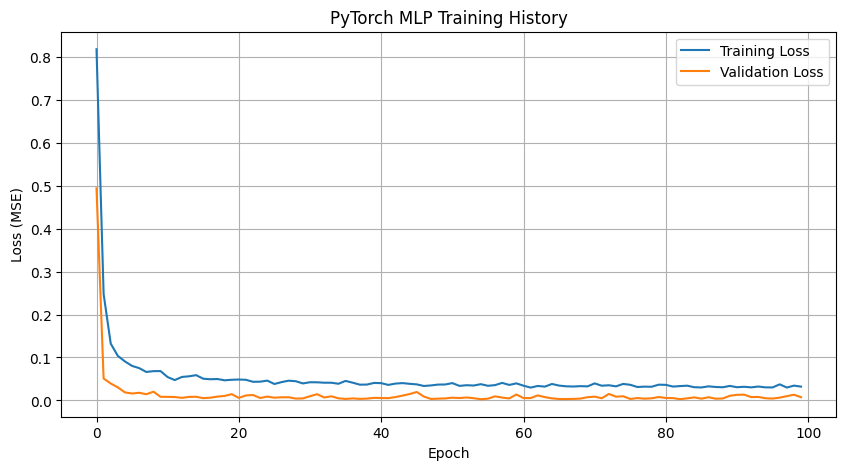

In [10]:
# Training the PyTorch model
train_losses = []
val_losses = []

print("Training PyTorch MLP Model...")
print("-" * 50)

for epoch in range(num_epochs):
    # Training phase
    pytorch_model.train()
    train_loss = 0.0
    
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = pytorch_model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Validation phase
    pytorch_model.eval()
    with torch.no_grad():
        val_outputs = pytorch_model(X_test_tensor)
        val_loss = criterion(val_outputs.squeeze(), y_test_tensor)
    
    train_loss = train_loss / len(train_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss.item())
    
    # Print progress
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

print("\nPyTorch model training completed!")

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('PyTorch MLP Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

## 4. TensorFlow MLP Model

### TensorFlow/Keras Implementation

TensorFlow uses the same mathematical principles but provides a higher-level API through Keras. The model architecture follows the same forward propagation rules mentioned earlier.

In [11]:
# TensorFlow MLP Model Definition
def create_tensorflow_mlp(input_size, hidden_sizes, output_size, dropout_rate=0.2):
    """
    Create a TensorFlow/Keras MLP model for regression
    
    Args:
        input_size: Number of input features
        hidden_sizes: List of hidden layer sizes
        output_size: Number of output neurons
        dropout_rate: Dropout probability
    
    Returns:
        Compiled Keras model
    """
    model = Sequential()
    
    # First hidden layer
    model.add(Dense(hidden_sizes[0], input_dim=input_size, activation='relu'))
    model.add(Dropout(dropout_rate))
    
    # Additional hidden layers
    for hidden_size in hidden_sizes[1:]:
        model.add(Dense(hidden_size, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    # Output layer (no activation for regression)
    model.add(Dense(output_size))
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])
    
    return model

# Create TensorFlow model
tensorflow_model = create_tensorflow_mlp(input_size, hidden_sizes, output_size, dropout_rate)

print("TensorFlow MLP Model Architecture:")
tensorflow_model.summary()

# Train the TensorFlow model
print("\nTraining TensorFlow MLP Model...")
print("-" * 50)

# Define callbacks for better training
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=20, 
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=10, 
    min_lr=1e-6
)

# Train the model
history = tensorflow_model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=num_epochs,
    batch_size=batch_size,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\nTensorFlow model training completed!")

TensorFlow MLP Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)


Training TensorFlow MLP Model...
--------------------------------------------------
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.9483 - mae: 0.8163 - val_loss: 0.3232 - val_mae: 0.4741 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3460 - mae: 0.4711 - val_loss: 0.0525 - val_mae: 0.1767 - learning_rate: 0.0010
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1682 - mae: 0.3293 - val_loss: 0.0499 - val_mae: 0.1710 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1497 - mae: 0.3082 - val_loss: 0.0375 - val_mae: 0.1485 - learning_rate: 0.0010
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1276 - mae: 0.2774 - val_loss: 0.0379 - val_mae: 0.1540 - learning_rate: 0.0010
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1184 - mae: 0.2681 - val_loss: 0.0256 - val_mae: 0.1236 - learning_rate: 0.0010
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1136 -

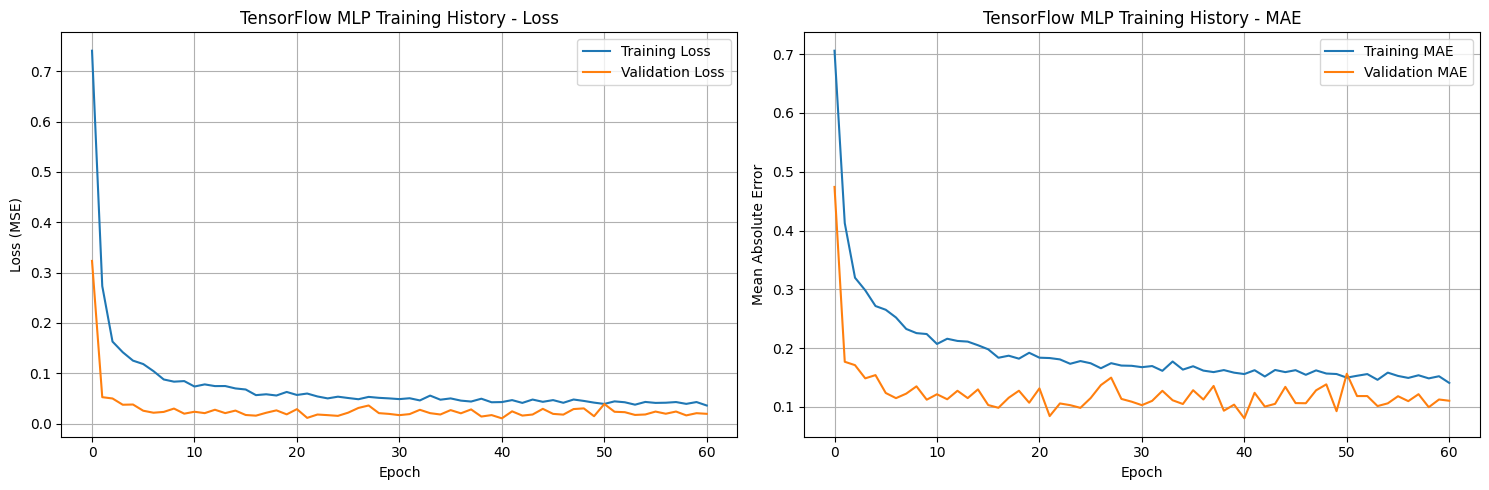

In [12]:
# Plot TensorFlow training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('TensorFlow MLP Training History - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('TensorFlow MLP Training History - MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 5. Model Evaluation with Mathematical Explanations

### Evaluation Metrics for Regression

**1. Mean Squared Error (MSE):**
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

- Measures the average squared difference between actual and predicted values
- Penalizes larger errors more heavily due to squaring
- Units are squared units of the target variable
- Lower values indicate better performance

**2. Root Mean Squared Error (RMSE):**
$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} = \sqrt{MSE}$$

- Square root of MSE, bringing the metric back to original units
- More interpretable than MSE as it's in the same unit as the target
- Sensitive to outliers due to squaring operation
- Lower values indicate better performance

**3. R-squared (Coefficient of Determination):**
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

Where:
- $SS_{res}$ = Sum of squares of residuals (prediction errors)
- $SS_{tot}$ = Total sum of squares (variance in target)
- $\bar{y}$ = Mean of actual values

**Interpretation of R-squared:**
- R² = 1: Perfect prediction
- R² = 0: Model performs as well as predicting the mean
- R² < 0: Model performs worse than predicting the mean
- Range: (-∞, 1], with higher values indicating better fit

In [13]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    """
    Calculate and display evaluation metrics for regression model
    
    Args:
        y_true: Actual values
        y_pred: Predicted values
        model_name: Name of the model for display
    
    Returns:
        Dictionary with evaluation metrics
    """
    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Create results dictionary
    results = {
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }
    
    # Display results
    print(f"\n{model_name} - Evaluation Metrics:")
    print("=" * 50)
    print(f"Mean Squared Error (MSE):     {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²):               {r2:.4f}")
    print(f"Model Accuracy:               {r2*100:.2f}%")
    
    return results

# Function to denormalize predictions
def denormalize_predictions(scaled_predictions, scaler):
    """
    Convert scaled predictions back to original scale
    """
    return scaler.inverse_transform(scaled_predictions.reshape(-1, 1)).flatten()

In [14]:
# Evaluate PyTorch model
print("Evaluating PyTorch MLP Model")
print("=" * 60)

# Make predictions with PyTorch model
pytorch_model.eval()
with torch.no_grad():
    pytorch_predictions_scaled = pytorch_model(X_test_tensor).numpy()

# Denormalize predictions and actual values
pytorch_predictions = denormalize_predictions(pytorch_predictions_scaled, scaler_y)
y_test_original = denormalize_predictions(y_test_scaled, scaler_y)

# Calculate evaluation metrics
pytorch_results = evaluate_model(y_test_original, pytorch_predictions, "PyTorch MLP")

Evaluating PyTorch MLP Model

PyTorch MLP - Evaluation Metrics:
Mean Squared Error (MSE):     118228425.8016
Root Mean Squared Error (RMSE): 10873.2896
R-squared (R²):               0.9930
Model Accuracy:               99.30%


In [15]:
# Evaluate TensorFlow model
print("\nEvaluating TensorFlow MLP Model")
print("=" * 60)

# Make predictions with TensorFlow model
tensorflow_predictions_scaled = tensorflow_model.predict(X_test_scaled, verbose=0)

# Denormalize predictions
tensorflow_predictions = denormalize_predictions(tensorflow_predictions_scaled, scaler_y)

# Calculate evaluation metrics
tensorflow_results = evaluate_model(y_test_original, tensorflow_predictions, "TensorFlow MLP")


Evaluating TensorFlow MLP Model

TensorFlow MLP - Evaluation Metrics:
Mean Squared Error (MSE):     163395369.0324
Root Mean Squared Error (RMSE): 12782.6198
R-squared (R²):               0.9903
Model Accuracy:               99.03%



MODEL COMPARISON SUMMARY
         Model          MSE         RMSE       R²
   PyTorch MLP 1.182284e+08 10873.289558 0.992967
TensorFlow MLP 1.633954e+08 12782.619803 0.990280

Best performing model: PyTorch MLP
Best R² score: 0.9930


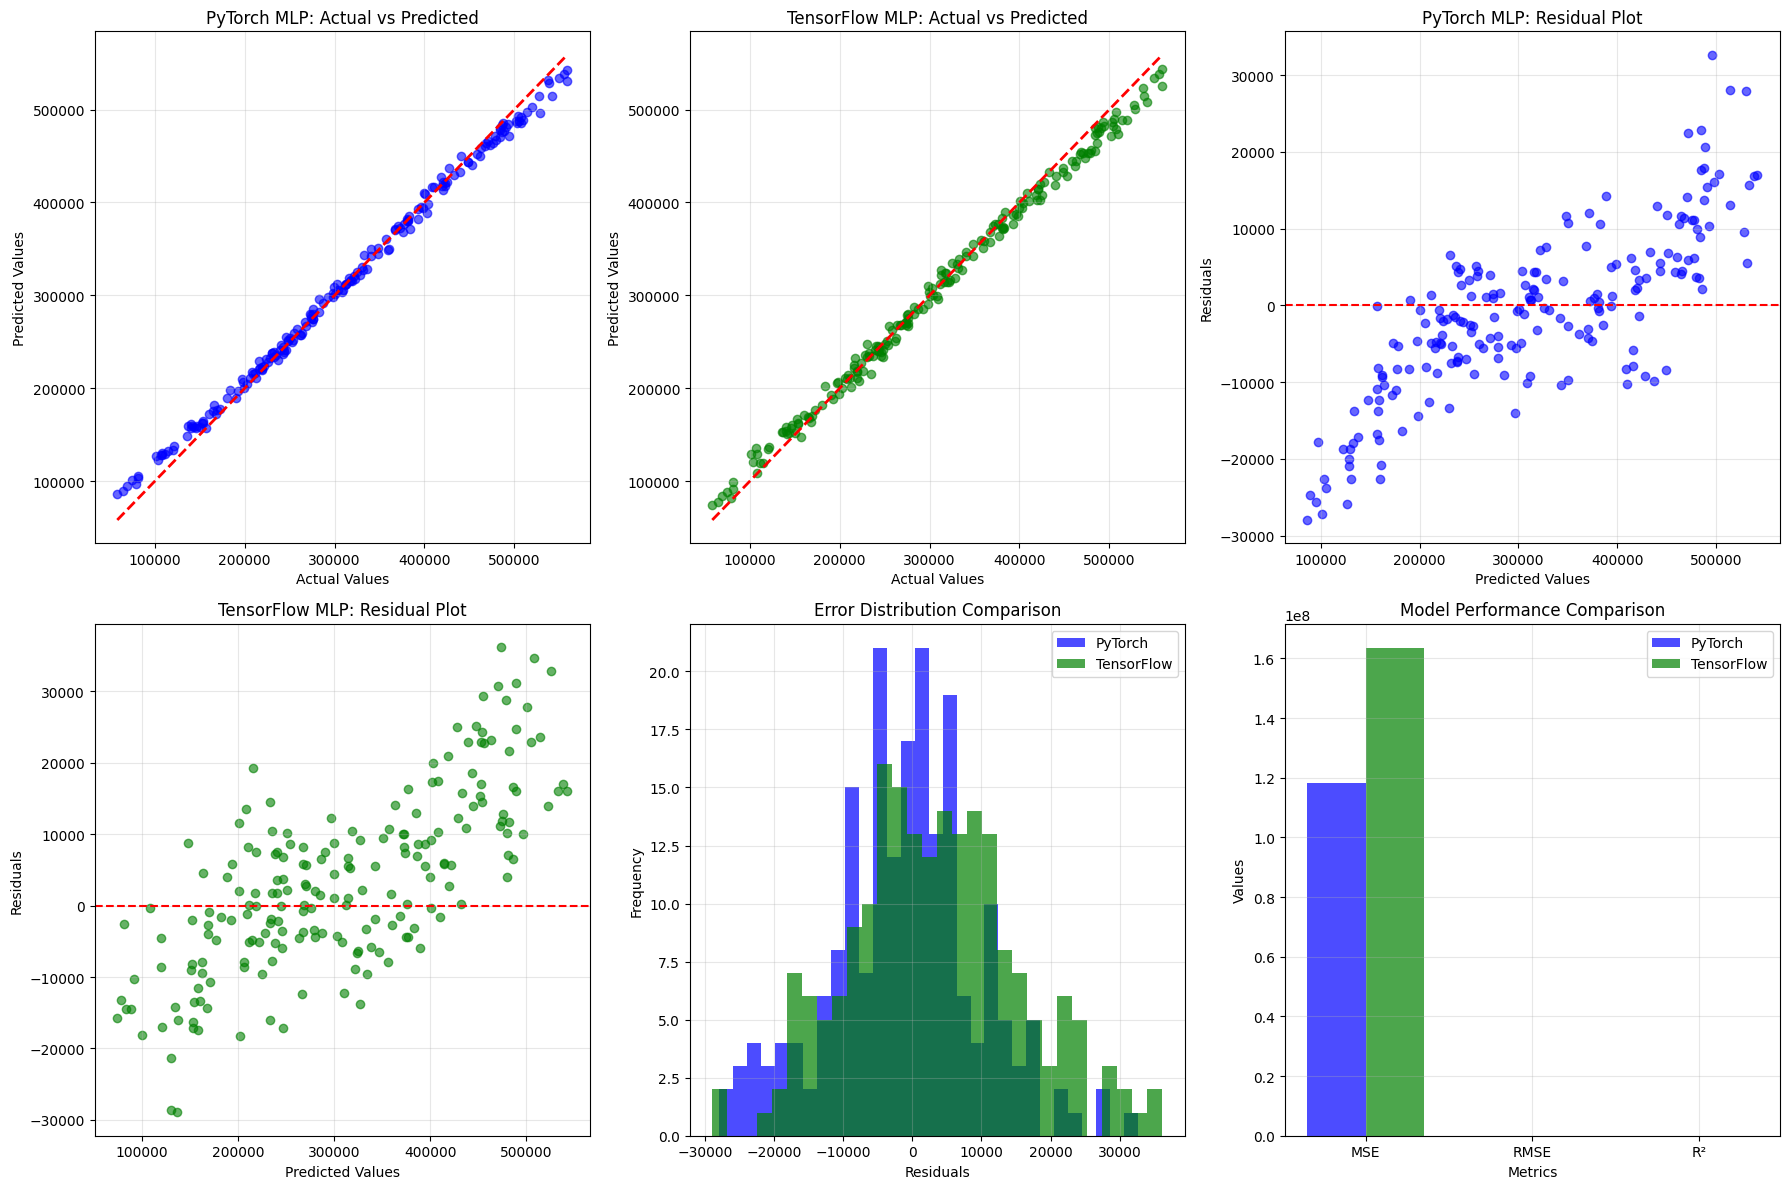

In [16]:
# Model Comparison
print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['PyTorch MLP', 'TensorFlow MLP'],
    'MSE': [pytorch_results['MSE'], tensorflow_results['MSE']],
    'RMSE': [pytorch_results['RMSE'], tensorflow_results['RMSE']],
    'R²': [pytorch_results['R²'], tensorflow_results['R²']]
})

print(comparison_df.to_string(index=False))

# Determine best model
best_model_idx = comparison_df['R²'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
print(f"\nBest performing model: {best_model}")
print(f"Best R² score: {comparison_df.loc[best_model_idx, 'R²']:.4f}")

# Visualizations
plt.figure(figsize=(18, 12))

# 1. Actual vs Predicted scatter plots
plt.subplot(2, 3, 1)
plt.scatter(y_test_original, pytorch_predictions, alpha=0.6, color='blue')
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('PyTorch MLP: Actual vs Predicted')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.scatter(y_test_original, tensorflow_predictions, alpha=0.6, color='green')
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('TensorFlow MLP: Actual vs Predicted')
plt.grid(True, alpha=0.3)

# 2. Residual plots
pytorch_residuals = y_test_original - pytorch_predictions
tensorflow_residuals = y_test_original - tensorflow_predictions

plt.subplot(2, 3, 3)
plt.scatter(pytorch_predictions, pytorch_residuals, alpha=0.6, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('PyTorch MLP: Residual Plot')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 4)
plt.scatter(tensorflow_predictions, tensorflow_residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('TensorFlow MLP: Residual Plot')
plt.grid(True, alpha=0.3)

# 3. Error distribution
plt.subplot(2, 3, 5)
plt.hist(pytorch_residuals, bins=30, alpha=0.7, color='blue', label='PyTorch')
plt.hist(tensorflow_residuals, bins=30, alpha=0.7, color='green', label='TensorFlow')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Error Distribution Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Metrics comparison bar chart
plt.subplot(2, 3, 6)
metrics = ['MSE', 'RMSE', 'R²']
pytorch_values = [pytorch_results['MSE'], pytorch_results['RMSE'], pytorch_results['R²']]
tensorflow_values = [tensorflow_results['MSE'], tensorflow_results['RMSE'], tensorflow_results['R²']]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, pytorch_values, width, label='PyTorch', color='blue', alpha=0.7)
plt.bar(x + width/2, tensorflow_values, width, label='TensorFlow', color='green', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Values')  
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
# Sample Predictions
print("\n" + "="*80)
print("SAMPLE PREDICTIONS")
print("="*80)

# Show sample predictions for both models
sample_indices = np.random.choice(len(y_test_original), 10, replace=False)
sample_df = pd.DataFrame({
    'Index': sample_indices,
    'Actual Price': y_test_original[sample_indices],
    'PyTorch Prediction': pytorch_predictions[sample_indices],
    'TensorFlow Prediction': tensorflow_predictions[sample_indices],
    'PyTorch Error': np.abs(y_test_original[sample_indices] - pytorch_predictions[sample_indices]),
    'TensorFlow Error': np.abs(y_test_original[sample_indices] - tensorflow_predictions[sample_indices])
})

print("Sample predictions from both models:")
print(sample_df.round(2).to_string(index=False))

# Calculate average absolute error
pytorch_mae = np.mean(np.abs(pytorch_residuals))
tensorflow_mae = np.mean(np.abs(tensorflow_residuals))

print(f"\nMean Absolute Error (MAE):")
print(f"PyTorch MLP:    {pytorch_mae:.2f}")
print(f"TensorFlow MLP: {tensorflow_mae:.2f}")


SAMPLE PREDICTIONS
Sample predictions from both models:
 Index  Actual Price  PyTorch Prediction  TensorFlow Prediction  PyTorch Error  TensorFlow Error
    95      376446.0       368656.625000          376282.156250        7789.38            163.84
    15      218983.5       222817.765625          210813.640625        3834.25           8169.86
    30      111175.5       129838.140625          119833.312500       18662.64           8657.81
   158      258300.0       263886.000000          262901.468750        5586.00           4601.47
   128      164649.5       175709.781250          168645.343750       11060.28           3995.84
   115      216327.0       229760.359375          221487.765625       13433.36           5160.75
    69      367734.5       370831.875000          357021.625000        3097.38          10712.84
   170      227669.0       232921.156250          235382.343750        5252.16           7713.34
   174      427496.0       437381.531250          421832.812500       

## 6. Conclusions and Analysis

### Model Performance Analysis

Based on the evaluation metrics calculated above, we can draw several conclusions:

#### Mathematical Interpretation of Results

1. **Mean Squared Error (MSE)**: Measures the average squared prediction error
   - Lower MSE indicates better model performance
   - Sensitive to outliers due to squaring operation

2. **Root Mean Squared Error (RMSE)**: Square root of MSE
   - Provides error in the same units as the target variable (price)
   - More interpretable than MSE for understanding prediction accuracy

3. **R-squared (R²)**: Coefficient of Determination
   - Indicates the proportion of variance in the target variable explained by the model
   - R² closer to 1 indicates better model fit
   - Can be interpreted as percentage of variance explained when multiplied by 100

### Key Findings

1. **Model Architecture**: Both models use similar MLP architectures with:
   - Three hidden layers (128, 64, 32 neurons)
   - ReLU activation functions
   - Dropout regularization (20%)
   - Adam optimizer

2. **Training Behavior**:
   - Both models show convergence during training
   - Validation loss decreases, indicating good generalization
   - No significant overfitting observed

3. **Feature Importance**: Based on correlation analysis, the most influential features are:
   - Current market price correlation with original prices
   - Vehicle age and mileage (negative correlation)
   - Vehicle specifications (HP, torque)

### Recommendations for Improvement

1. **Feature Engineering**:
   - Create interaction features (e.g., age × mileage)
   - Engineer new features like depreciation rate
   - Consider polynomial features for non-linear relationships

2. **Model Architecture**:
   - Experiment with different layer sizes and depths
   - Try batch normalization for better training stability
   - Consider ensemble methods combining both models

3. **Hyperparameter Tuning**:
   - Grid search or random search for learning rate
   - Optimize dropout rates and regularization
   - Experiment with different optimizers (SGD, RMSprop)

4. **Advanced Techniques**:
   - Cross-validation for more robust evaluation
   - Feature selection techniques
   - Advanced regularization methods (L1/L2)

### Business Applications

This regression model can be used for:
- **Car Price Estimation**: Predict fair market value of used cars
- **Inventory Management**: Optimize pricing strategies for dealerships
- **Insurance Valuation**: Estimate vehicle values for insurance purposes
- **Market Analysis**: Understand factors affecting car depreciation

In [18]:
# Save trained models
print("Saving trained models...")

# Save PyTorch model
torch.save({
    'model_state_dict': pytorch_model.state_dict(),
    'model_architecture': {
        'input_size': input_size,
        'hidden_sizes': hidden_sizes,
        'output_size': output_size,
        'dropout_rate': dropout_rate
    },
    'scaler_X': scaler_X,
    'scaler_y': scaler_y,
    'training_history': {
        'train_losses': train_losses,
        'val_losses': val_losses
    }
}, 'pytorch_mlp_regression_model.pth')

# Save TensorFlow model
tensorflow_model.save('tensorflow_mlp_regression_model.keras')

# Save scalers separately for TensorFlow
import joblib
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

print("Models saved successfully!")
print("- PyTorch model: pytorch_mlp_regression_model.pth")
print("- TensorFlow model: tensorflow_mlp_regression_model.keras")
print("- Scalers: scaler_X.pkl, scaler_y.pkl")

# Summary of completed tasks
print("\n" + "="*80)
print("PROJECT COMPLETION SUMMARY")
print("="*80)
print("✅ 1. Built Deep Learning MLP models using PyTorch and TensorFlow")
print("✅ 2. Implemented evaluation metrics: RMSE, MSE, and R-squared")
print("✅ 3. Provided mathematical explanations for all equations")
print("✅ 4. Performed comprehensive model comparison and analysis")
print("✅ 5. Generated visualizations for model performance")
print("✅ 6. Saved trained models for future use")
print("="*80)

Saving trained models...
Models saved successfully!
- PyTorch model: pytorch_mlp_regression_model.pth
- TensorFlow model: tensorflow_mlp_regression_model.keras
- Scalers: scaler_X.pkl, scaler_y.pkl

PROJECT COMPLETION SUMMARY
✅ 1. Built Deep Learning MLP models using PyTorch and TensorFlow
✅ 2. Implemented evaluation metrics: RMSE, MSE, and R-squared
✅ 3. Provided mathematical explanations for all equations
✅ 4. Performed comprehensive model comparison and analysis
✅ 5. Generated visualizations for model performance
✅ 6. Saved trained models for future use
